### Pandas

Pandas is one of the most popular Python libraries for Data Science and Analytics. Pandas library is built on top of Numpy, meaning Pandas needs Numpy to operate. It introduce two new objects DataFrame and Series.

We can import pandas conventionally as: ```import pandas as pd```. Let's define a DataFrame:

In [106]:
import pandas as pd  
    
# list1  
lst = [['tom', 25], ['krish', 30], 
       ['nick', 26], ['juli', 22]] 
    
df = pd.DataFrame(lst, columns =['Name', 'Age']) 
df

,Name,Age
0,tom,25
1,krish,30
2,nick,26
3,juli,22


Series has one parameters, the data, that can be a list, a dictionary, or a scalar value:

In [107]:
pd.Series([1., 2., 3.])

0    1.0
1    2.0
2    3.0
dtype: float64

Pandas is excellent to read from excell or csv txt etc:

In [203]:
df = pd.read_csv('etc__default_format.csv', sep=';', dayfirst=True, parse_dates = [0], header=None, 
                 names = ['Datetime','Name','Val'])

In [205]:
# Save this for later:
# df.pivot_table(values = 'Val', index = 'Datetime', columns = 'Name')

Note that above we have red a dafault Etc format, sep is the data separator, dayfirst is the date format, parse_date is the column to parse and names are the columns name

In [109]:
df.columns

Index(['Datetime', 'Name', 'Val'], dtype='object')

In [110]:
df.shape

(9, 3)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  9 non-null      datetime64[ns]
 1   Name      9 non-null      object        
 2   Val       9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 344.0+ bytes


In [112]:
df.describe()

,Val
count,9.000000
mean,5.000000
std,2.738613
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


We can select a column with different methods:

In [113]:
df['Name'].head() # 2nd place

0    SensoreA
1    SensoreB
2    SensoreC
3    SensoreA
4    SensoreB
Name: Name, dtype: object

In [114]:
df.Name.tail() # do not use pls

4    SensoreB
5    SensoreC
6    SensoreA
7    SensoreB
8    SensoreC
Name: Name, dtype: object

In [115]:
df.loc[:,'Name'].sample(5) # this is the one that I prefer

4    SensoreB
0    SensoreA
2    SensoreC
7    SensoreB
8    SensoreC
Name: Name, dtype: object

We can also apply condition:

In [116]:
df[df['Name'] == 'SensoreA'].iloc[:,[2,1]]

,Val,Name
0,1.0,SensoreA
3,4.0,SensoreA
6,7.0,SensoreA


Remeber ```.loc``` want the column name ```.iloc``` wants the column number

In [117]:
df.head(2).loc[:, ['Name', 'Datetime']]

,Name,Datetime
0,SensoreA,2021-03-08 15:56:00
1,SensoreB,2021-03-08 15:56:00


With pandas we can easily perform aggregation:

In [118]:
df.count()

Datetime    9
Name        9
Val         9
dtype: int64

In [119]:
df['Val'].sum()

45.0

In [120]:
df['Val'].median()

5.0

You can also group and then perform your aggregation:

In [121]:
df.groupby('Name').min() # here min has performed operation an datetime object too

,Datetime,Val
Name,,
SensoreA,2021-03-08 15:56:00,1.0
SensoreB,2021-03-08 15:56:00,2.0
SensoreC,2021-03-08 15:56:00,3.0


In [122]:
df.groupby('Name').sum() # here obviuosly sum for date has no sense

,Val
Name,
SensoreA,12.0
SensoreB,15.0
SensoreC,18.0


Pandas allows you to merge DataFrame:

In [123]:
df2=pd.read_csv('test.csv', sep = ';', parse_dates = [0], dayfirst = True, names = ['Datetime','Name','Valid'])

In [124]:
df.merge(df2, left_on = ['Datetime','Name'], right_on = ['Datetime','Name'])

,Datetime,Name,Val,Valid
0,2021-03-08 15:56:00,SensoreA,1.0,1
1,2021-03-08 15:57:00,SensoreA,4.0,0
2,2021-03-08 15:58:00,SensoreB,8.0,1


In [125]:
df3 = df.merge(df2, left_on = ['Datetime','Name'], right_on = ['Datetime','Name'], how = 'outer')
df3

,Datetime,Name,Val,Valid
0,2021-03-08 15:56:00,SensoreA,1.0,1.0
1,2021-03-08 15:56:00,SensoreB,2.0,NaN
2,2021-03-08 15:56:00,SensoreC,3.0,NaN
3,2021-03-08 15:57:00,SensoreA,4.0,0.0
4,2021-03-08 15:57:00,SensoreB,5.0,NaN
5,2021-03-08 15:57:00,SensoreC,6.0,NaN
6,2021-03-08 15:58:00,SensoreA,7.0,NaN
7,2021-03-08 15:58:00,SensoreB,8.0,1.0
8,2021-03-08 15:58:00,SensoreC,9.0,NaN


In [126]:
df3.isnull().sum() # count the NaN for every column

Datetime    0
Name        0
Val         0
Valid       6
dtype: int64

Another great feature is to sort result:

In [127]:
df.sort_values(by = 'Val', ascending=False)

,Datetime,Name,Val
8,2021-03-08 15:58:00,SensoreC,9.0
7,2021-03-08 15:58:00,SensoreB,8.0
6,2021-03-08 15:58:00,SensoreA,7.0
5,2021-03-08 15:57:00,SensoreC,6.0
4,2021-03-08 15:57:00,SensoreB,5.0
3,2021-03-08 15:57:00,SensoreA,4.0
2,2021-03-08 15:56:00,SensoreC,3.0
1,2021-03-08 15:56:00,SensoreB,2.0
0,2021-03-08 15:56:00,SensoreA,1.0


Index are very useful for time series, is a good practice set the Datetime as index 

In [128]:
df3.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [129]:
df3.set_index('Datetime',inplace = True)

In [130]:
df3.index

DatetimeIndex(['2021-03-08 15:56:00', '2021-03-08 15:56:00',
               '2021-03-08 15:56:00', '2021-03-08 15:57:00',
               '2021-03-08 15:57:00', '2021-03-08 15:57:00',
               '2021-03-08 15:58:00', '2021-03-08 15:58:00',
               '2021-03-08 15:58:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [131]:
df3.loc['2021-03-08 15:56:00'].reset_index() # Note that we can use this to order index

,Datetime,Name,Val,Valid
0,2021-03-08 15:56:00,SensoreA,1.0,1.0
1,2021-03-08 15:56:00,SensoreB,2.0,NaN
2,2021-03-08 15:56:00,SensoreC,3.0,NaN


In [132]:
df3.iloc[:,-1]

Datetime
2021-03-08 15:56:00    1.0
2021-03-08 15:56:00    NaN
2021-03-08 15:56:00    NaN
2021-03-08 15:57:00    0.0
2021-03-08 15:57:00    NaN
2021-03-08 15:57:00    NaN
2021-03-08 15:58:00    NaN
2021-03-08 15:58:00    1.0
2021-03-08 15:58:00    NaN
Name: Valid, dtype: float64

In [133]:
df3.loc['2021-03-08 15:56:00', ['Name','Valid']] # loc for exact name!

,Name,Valid
Datetime,,
2021-03-08 15:56:00,SensoreA,1.0
2021-03-08 15:56:00,SensoreB,NaN
2021-03-08 15:56:00,SensoreC,NaN


In [134]:
df3.loc['2021-03-08 15:56:00':'2021-03-08 15:57:00'] # slice

,Name,Val,Valid
Datetime,,,
2021-03-08 15:56:00,SensoreA,1.0,1.0
2021-03-08 15:56:00,SensoreB,2.0,NaN
2021-03-08 15:56:00,SensoreC,3.0,NaN
2021-03-08 15:57:00,SensoreA,4.0,0.0
2021-03-08 15:57:00,SensoreB,5.0,NaN
2021-03-08 15:57:00,SensoreC,6.0,NaN


We can easily impute ```NaN``` values

In [135]:
df3.fillna('unknown')

,Name,Val,Valid
Datetime,,,
2021-03-08 15:56:00,SensoreA,1.0,1
2021-03-08 15:56:00,SensoreB,2.0,unknown
2021-03-08 15:56:00,SensoreC,3.0,unknown
2021-03-08 15:57:00,SensoreA,4.0,0
2021-03-08 15:57:00,SensoreB,5.0,unknown
2021-03-08 15:57:00,SensoreC,6.0,unknown
2021-03-08 15:58:00,SensoreA,7.0,unknown
2021-03-08 15:58:00,SensoreB,8.0,1
2021-03-08 15:58:00,SensoreC,9.0,unknown


In [136]:
df3.fillna(method = 'bfill')

,Name,Val,Valid
Datetime,,,
2021-03-08 15:56:00,SensoreA,1.0,1.0
2021-03-08 15:56:00,SensoreB,2.0,0.0
2021-03-08 15:56:00,SensoreC,3.0,0.0
2021-03-08 15:57:00,SensoreA,4.0,0.0
2021-03-08 15:57:00,SensoreB,5.0,1.0
2021-03-08 15:57:00,SensoreC,6.0,1.0
2021-03-08 15:58:00,SensoreA,7.0,1.0
2021-03-08 15:58:00,SensoreB,8.0,1.0
2021-03-08 15:58:00,SensoreC,9.0,NaN


In [137]:
df3.dropna() # care here we drop all raws with even one NaN

,Name,Val,Valid
Datetime,,,
2021-03-08 15:56:00,SensoreA,1.0,1.0
2021-03-08 15:57:00,SensoreA,4.0,0.0
2021-03-08 15:58:00,SensoreB,8.0,1.0


Pandas has nice function to handle duplicates:

In [138]:
df_new = pd.concat([df, df]) # create a DataFrame 2 times df 

In [139]:
df_new.drop_duplicates()

,Datetime,Name,Val
0,2021-03-08 15:56:00,SensoreA,1.0
1,2021-03-08 15:56:00,SensoreB,2.0
2,2021-03-08 15:56:00,SensoreC,3.0
3,2021-03-08 15:57:00,SensoreA,4.0
4,2021-03-08 15:57:00,SensoreB,5.0
5,2021-03-08 15:57:00,SensoreC,6.0
6,2021-03-08 15:58:00,SensoreA,7.0
7,2021-03-08 15:58:00,SensoreB,8.0
8,2021-03-08 15:58:00,SensoreC,9.0


We can also apply multiple condition when selecting:

In [140]:
df[(df['Name'] == 'SensoreA') | (df['Name'] == 'SensoreB')]

,Datetime,Name,Val
0,2021-03-08 15:56:00,SensoreA,1.0
1,2021-03-08 15:56:00,SensoreB,2.0
3,2021-03-08 15:57:00,SensoreA,4.0
4,2021-03-08 15:57:00,SensoreB,5.0
6,2021-03-08 15:58:00,SensoreA,7.0
7,2021-03-08 15:58:00,SensoreB,8.0


In [141]:
df[df['Name'].isin(['SensoreA', 'SensoreB'])]

,Datetime,Name,Val
0,2021-03-08 15:56:00,SensoreA,1.0
1,2021-03-08 15:56:00,SensoreB,2.0
3,2021-03-08 15:57:00,SensoreA,4.0
4,2021-03-08 15:57:00,SensoreB,5.0
6,2021-03-08 15:58:00,SensoreA,7.0
7,2021-03-08 15:58:00,SensoreB,8.0


Pandas can apply function to the whole DataFrame easily:

In [142]:
def is_valid(x):
    if x == 1:
        return 'Valid'
    else:
        return 'Not_valid'

In [143]:
df3['is_valid'] = df3['Valid'].apply(is_valid)
df3

,Name,Val,Valid,is_valid
Datetime,,,,
2021-03-08 15:56:00,SensoreA,1.0,1.0,Valid
2021-03-08 15:56:00,SensoreB,2.0,NaN,Not_valid
2021-03-08 15:56:00,SensoreC,3.0,NaN,Not_valid
2021-03-08 15:57:00,SensoreA,4.0,0.0,Not_valid
2021-03-08 15:57:00,SensoreB,5.0,NaN,Not_valid
2021-03-08 15:57:00,SensoreC,6.0,NaN,Not_valid
2021-03-08 15:58:00,SensoreA,7.0,NaN,Not_valid
2021-03-08 15:58:00,SensoreB,8.0,1.0,Valid
2021-03-08 15:58:00,SensoreC,9.0,NaN,Not_valid


In [144]:
df3["Magnitude"] = df3["Val"].apply(lambda x: 'good' if x >= 4.0 else 'bad')

In [145]:
df3

,Name,Val,Valid,is_valid,Magnitude
Datetime,,,,,
2021-03-08 15:56:00,SensoreA,1.0,1.0,Valid,bad
2021-03-08 15:56:00,SensoreB,2.0,NaN,Not_valid,bad
2021-03-08 15:56:00,SensoreC,3.0,NaN,Not_valid,bad
2021-03-08 15:57:00,SensoreA,4.0,0.0,Not_valid,good
2021-03-08 15:57:00,SensoreB,5.0,NaN,Not_valid,good
2021-03-08 15:57:00,SensoreC,6.0,NaN,Not_valid,good
2021-03-08 15:58:00,SensoreA,7.0,NaN,Not_valid,good
2021-03-08 15:58:00,SensoreB,8.0,1.0,Valid,good
2021-03-08 15:58:00,SensoreC,9.0,NaN,Not_valid,good


In oder to manage we often use datetime library. We can import it as ```from datetime import datetime```. It will allow us to handle date easily.  

In [146]:
from datetime import datetime 
datetime(year=1991, month=12, day=25)

datetime.datetime(1991, 12, 25, 0, 0)

Parse means trasporm an object in a datetime type

In [147]:
from datetime import date
date.today().strftime('%Y-%b-%d-%A') # for the dictionary of this look at doc

'2021-Mar-08-Monday'

In [148]:
from datetime import timedelta
datetime.now() + timedelta(hours=10)

datetime.datetime(2021, 3, 9, 2, 56, 14, 613939)

Pandas has its own datetime module but I recommend to use rarely:

In [149]:
pd.to_datetime("25th of December, 1991")

Timestamp('1991-12-25 00:00:00')

In [150]:
pd.to_datetime('today')+pd.to_timedelta(10,'hours')

Timestamp('2021-03-09 02:56:15.300588')

Date are very useful in order to manage time series with resampling method for example:

In [212]:
import numpy as np
np.random.seed(4)
N = 1000
rng = pd.date_range('1991-12-25', freq='T', periods=N)
df = pd.DataFrame(np.random.rand(N, 2), index=rng)

In [213]:
df.head()

,0,1
1991-12-25 00:00:00,0.967030,0.547232
1991-12-25 00:01:00,0.972684,0.714816
1991-12-25 00:02:00,0.697729,0.216089
1991-12-25 00:03:00,0.976274,0.006230
1991-12-25 00:04:00,0.252982,0.434792


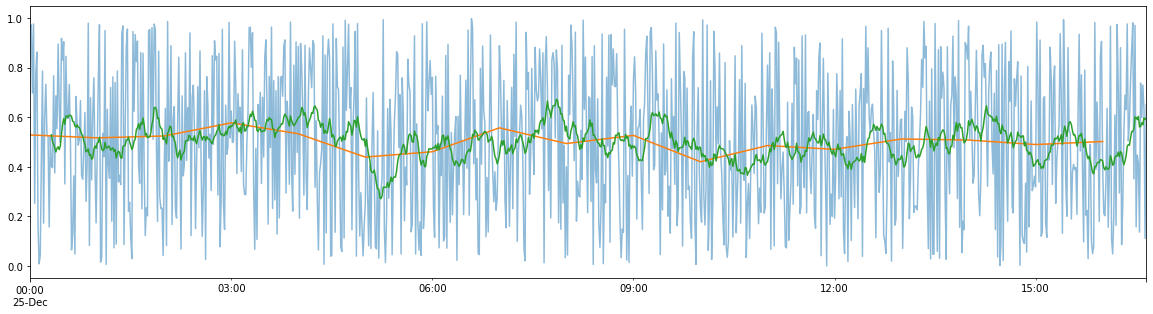

In [216]:
df[0].plot(figsize=(20,5),alpha=0.5);
df.resample('H').mean()[0].plot();
df.rolling(20).mean()[0].plot();